In [3]:
from skimage.transform import rotate,hough_line,hough_line_peaks

In [4]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [5]:
def binary(img, threshold):
    gray = rgb2gray(img)*255
    bin_img = 255*(gray > threshold)
    return bin_img

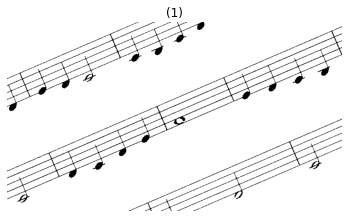

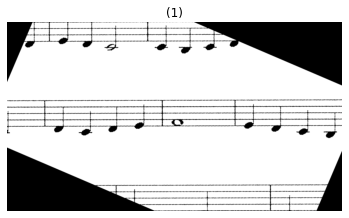

In [52]:
from skimage.filters import gaussian, threshold_otsu
from skimage.feature import canny
from skimage.transform import probabilistic_hough_line, rotate

import numpy as np
import os
import math

def deskew(image):
    thresh = threshold_otsu(image)
    normalize = image > thresh
    blur = gaussian(normalize, 3)
    edges = canny(blur)
    out, angles, d = hough_line(edges)
    x = np.where(out == np.max(out))
    rotation_number = (np.degrees(angles[x[1]]))
    #hough_lines = probabilistic_hough_line(edges)
    #slopes = [(y2 - y1)/(x2 - x1) if (x2-x1) else 0 for (x1,y1), (x2, y2) in hough_lines]
    #rad_angles = [np.arctan(x) for x in slopes]
    #deg_angles = [np.degrees(x) for x in rad_angles]
    #histo = np.histogram(deg_angles, bins=180)
    #rotation_number = histo[1][np.argmax(histo[0])]
    if rotation_number > 45:
        rotation_number = -(90-rotation_number)
    elif rotation_number < -45:
        rotation_number = 90 - abs(rotation_number)
    return rotation_number
img = io.imread('dataset/mo3eedrotated.jpg');
img = binary(img,128)
show_images([img])
theta = deskew(img)
img = rotate(img , theta)
show_images([img])